In [1]:
import pandas as pd

# Specify the file path relative to your Google Drive root
file_path = '/home/mackenzie/gym-gazebo-noetic/examples/gazebo_wheel/runs/telemetry/Feb02-16-13-38-rlwheel.csv'

# Load the CSV into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()
df['cam x'] = df['cam x'] * -1

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


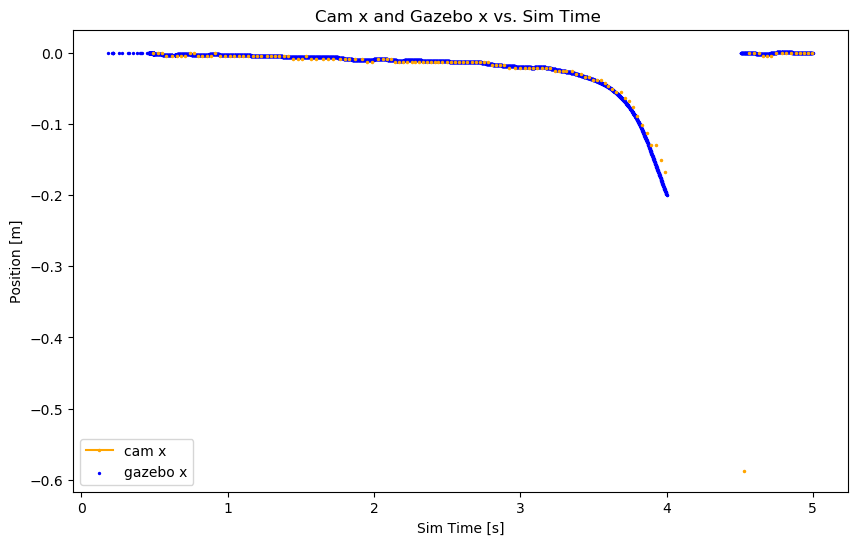

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot 'gazebo x'

df['sim time'] = pd.to_numeric(df['sim time'], errors='coerce')
df['gazebo x'] = pd.to_numeric(df['gazebo x'], errors='coerce')

filtered_df = df[df['sim time'] < 5]

range_start = -0.2
range_end = 0.2

filtered_data = filtered_df[((filtered_df['gazebo x'] >= range_start) & (filtered_df['gazebo x'] <= range_end))]

# Plot the filtered data
# plt.plot(filtered_data['sim time'], filtered_data['gazebo x'], label='gazebo x', marker='o', markersize=2)
plt.scatter(filtered_data['sim time'], filtered_data['gazebo x'], label='gazebo x', marker='o', color='blue', s=2)
# Plot 'cam x'
plt.plot(filtered_df['sim time'], filtered_df['cam x'], label='cam x', marker='o',color='orange',markersize=1.5)

# Set labels and title
plt.xlabel('Sim Time [s]')
plt.ylabel('Position [m]')
plt.title('Cam x and Gazebo x vs. Sim Time ')

# Show legend
plt.legend()

# Show the plot
plt.show()

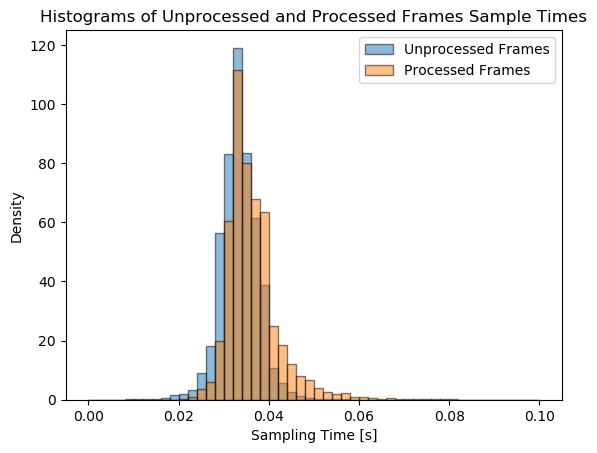

In [3]:
df_filtered = df[(df['sim time'] >= 0)]

# Filter the DataFrame to include only rows where 'raw image received' is true
df_image_received = df_filtered[df_filtered['raw image received'] == 1]

# Create an array of time differences between consecutive rows with 'raw image received' true
time_diff_array_unprocessed_frames = df_image_received['sim time'].diff().dropna()

df_image_processed = df.dropna(subset=['cam x'])

# Create an array of time differences between consecutive rows with 'raw image received' true
time_diff_array_processed_frames = df_image_processed['sim time'].diff().dropna()

# Plot histograms of unprocessed and processed frames over each other
plt.hist(time_diff_array_unprocessed_frames, bins=50, alpha=0.5, range=(0,0.1), label='Unprocessed Frames', density=True, edgecolor='black')
plt.hist(time_diff_array_processed_frames, bins=50, alpha=0.5, range=(0,0.1), label='Processed Frames', density=True, edgecolor='black')

# Add labels and title
plt.xlabel('Sampling Time [s]')
plt.ylabel('Density')
plt.title('Histograms of Unprocessed and Processed Frames Sample Times')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [4]:
import numpy as np

# Set the range for filtering
range_start = 0
range_end = 0.1

# Filter data within the specified range
filtered_unprocessed = time_diff_array_unprocessed_frames[(time_diff_array_unprocessed_frames >= range_start) & (time_diff_array_unprocessed_frames <= range_end)]
filtered_processed = time_diff_array_processed_frames[(time_diff_array_processed_frames >= range_start) & (time_diff_array_processed_frames <= range_end)]

print(f"Average Sample Rate of Raw Images: {1/np.mean(filtered_unprocessed):.2f} samples per second")
print(f"Average Sample Rate of Processed Frames: {1/np.mean(filtered_processed):.2f} samples per second")

Average Sample Rate of Raw Images: 30.00 samples per second
Average Sample Rate of Processed Frames: 27.55 samples per second
